# Base Model
This base model has been created using a data set containing images in gray scale. Each image is framed just to the face in each expression represents one of seven emotions (happy, sad, angry, fear, disgust, neutral and surprise). The number of images for the training set is 28,709 in the seven classes and the testing set contains 7,178 images in the seven classes.

This is the first model created to train the data set. The idea is to look at the initial implementation and from there increase the number of layers and improve the parameters inputed. 

The first part is the architecture of this base model which is composed by the input layer, one hidden layer and the output layer. The class that will be used is Sequential from the Keras library to initialize the Convolutional Neural Network. Then for a convolution a Convolution2D is added where the parameters include the size of the images we are going to input, in this particular case 48x48 to gray scale, and the Activation will be the relu function. For the Pooling, MaxPooling2D will be used with a pool-size of 2x2 followed by Flattening with Flatten function. In addition to the Convolution layer which is the input layer, two Dense layers will be included. The first one is the hidden layer that will have 128 neurons and relu as activation function. The second Dense layer will be the output layer, which will have seven categories in this case (the dataset has seven emotions to gray scale) and the activation function that is softmax. With this, we finish all the connections needed for the Convolutional Neural Network.The following step is to compile the Convolutional Neural Network using adam as optimizer, categorical crossentropy for the loss, and accuracy for the metrics.

The second part is fitting the Convolutional Neural Network to the images, but before it an ImageDataGenerator is included to generate more images through transformation of the orginals. This transformation include rescaling, shearing, zooming, and horizontal flipping all the original images to create more and train in a better way our Convolutional Neural Network. Subsequently, the train and test set will be loaded including the path to each of the folders, the target expected size that images should have, the batch step which is 32, the colour that in this case must be included that is gray scale, and categorical as class mode. Finally, the fitting step where the training set is included, the number of epochs is initialized with 30, the validation data which is the test set and the verbose input to 1 to see how the accuracy and loss are improved with epoch.

The table of contents for this file is as follows:
   #### 2.1   Packages and Libraries
   #### 2.2 Exploring Images
   #### 2.3   Initialize the Convolutional Neural Network
   #### 2.4   Convolution
   #### 2.5   Pooling
   #### 2.6   Flattening
   #### 2.7   Full Conection
   #### 2.8   Compiling the Convolutional Neural Network
   #### 2.9   Model Summary
   #### 2.10   Generating More Images
   #### 2.11 Fitting the Convolutional Neural Network

## 2.1 Packages and Libraries

In [1]:
# These are all the packages and libraries that will be
#used for the Convolutional Neural Network
import tensorflow

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from IPython.display import display
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import matplotlib.image as img

# 2.2 Exploring Images
In this step, an analysis of the dataset is performed. Looking at the shape and color level,and at the same time, plotting images to have an idea of who the dataset will look like.

In [8]:
# Exploring shape and colour level for some of the images
#in the test set for the happy emotion
images = []
for i in range(10):
    im = img.imread(r"C:\Users\vicky\lighthouse-data-notes\Final project\feelings\train\happy\im{}.PNG".format(i))
    images.append(im)
    print('image shape', im.shape, 'maximum color level', im.max())

image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 0.92941177
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 0.9254902
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0


Noticing that images are size 48 by 48 is an important parameter for the input layer in the Convolutional Neural Network. Also, the maximum color level is always below or equal to 1 and this happen because our dataset is composed by gray scale images. In case the images are colorful, the maximum value will be between zero and three.

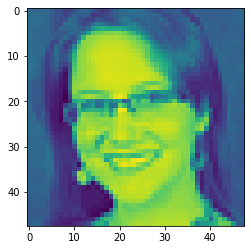

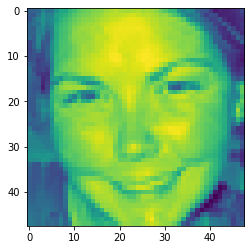

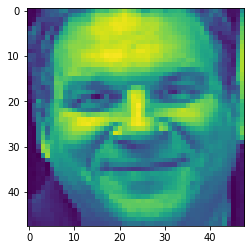

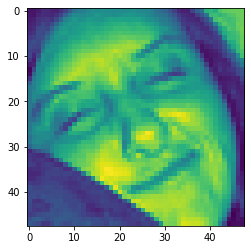

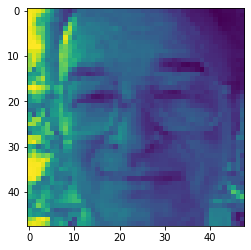

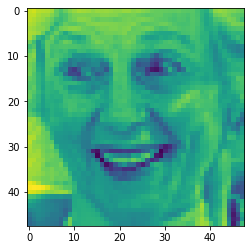

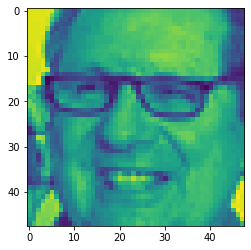

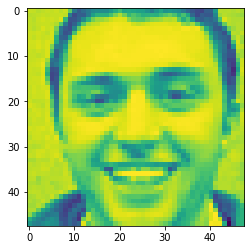

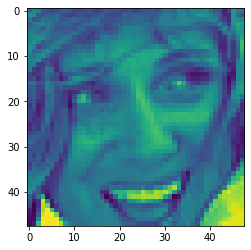

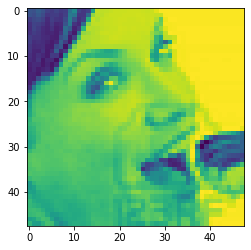

In [16]:
for i in range(10):
    img = mpimg.imread(r"C:\Users\vicky\lighthouse-data-notes\Final project\feelings\train\happy\im{}.PNG".format(i))
    imgplot = plt.imshow(img)
    plt.show()

## 2.3 Initializing the Convolutional Neural Network

In [4]:
#Initialize the CNN
classifier = Sequential()

## 2.4 Convolution
Inside of the initialization of a Convolutional Neural Network breaking step down can be done to understand the process that is followed. In this case, convolution is the first step

In [5]:
#step1 - Convolution
classifier.add(Convolution2D(32, 3 ,3, 
                             input_shape = (48, 48, 1), 
                             activation = 'relu'))

## 2.5 Pooling
This is the second step in the initializing process

In [6]:
#Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

## 2.6 Flattening
Third step in the initializing process

In [7]:
#Step 3 - Flattening
classifier.add(Flatten())

## 2.7 Full Connection
In this fourth step, we create the hidden and output layer to create a full connection with the input layer

In [8]:
#Step 4 - Full Connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(7, activation='softmax'))

## 2.8 Compiling the Convolutional Neural Network
Final part of the initializing process and the model is ready for the second part which is the fitting

In [9]:
#Compiling the CNN
classifier.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

## 2.9 Model Summary

In [10]:
#A summary of the model is printed to review the different
#outputs after each layer
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
Total params: 263,495
Trainable params: 263,495
Non-trainable params: 0
_________________________________________________________________


In the summary appears the type of model used (Sequential), the  names of the different steps and their respective output shape. It is noticeable that the conv2d is the input layer and the output shape of the images will be 16 by 16, given a total of 320 parameters.
In the pooling the images are reduced by half again and there are not parameters aggregated. Same for the flatten layer, there are no parameters aggregated. Followed by one Dense layer this is the hidden layer which contain 128*2048=262272 parameters. At the end, the Dense layer dense_1 is the output layer with a total number of parameters of 903. The total number of parameters is 320+262272+903=263495 which is low because the number of hidden layers is one.

## 2.10 Generating More Images
The idea is to create more images from the ones in the training test by making transformation such as rescaling, shearing, zooming and flipping

In [12]:
#Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'feelings/train',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    'feelings/test',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## 2.11 Fitting the Convolutional Neural Network
In this step, parameters are imputed such as the training set, epoch to thirty, testing set, and vebose to one looking for information related to the time for epoch, loss and accuracy.

In [ ]:
# history variable contains information from the fitting that
#can help to plot loss and accuracy graphs
history = classifier.fit(
    training_set,
    epochs=30,
    validation_data=test_set,
    verbose=1)